# ClaSP Visualization
In this notebook, we visualize ClaSS or competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', None)

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../")

In [3]:
from src.profile_visualization import plot_profile_with_ts
from src.utils import load_dataset

Let's load some score profiles.

In [4]:
dataset = "MIT-BIH-Arr"
df_data = load_dataset(dataset)
df_data

,name,window_size,change_points,time_series
0,MIT-BIH-Arr_MLII_Subject100,360,[],"[-0.145, -0.145, -0.145, -0.145, -0.145, -0.14..."
1,MIT-BIH-Arr_V5_Subject100,360,[],"[-0.065, -0.065, -0.065, -0.065, -0.065, -0.06..."
2,MIT-BIH-Arr_MLII_Subject101,360,[],"[-0.345, -0.345, -0.345, -0.345, -0.345, -0.34..."
3,MIT-BIH-Arr_V1_Subject101,360,[],"[-0.16, -0.16, -0.16, -0.16, -0.16, -0.16, -0...."
4,MIT-BIH-Arr_V5_Subject102,360,"[29133, 34216, 38682, 62969]","[-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0...."
5,MIT-BIH-Arr_V2_Subject102,360,"[29133, 34216, 38682, 62969]","[0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.0..."
6,MIT-BIH-Arr_MLII_Subject103,360,[],"[-0.375, -0.375, -0.375, -0.375, -0.375, -0.37..."
7,MIT-BIH-Arr_V2_Subject103,360,[],"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0..."
8,MIT-BIH-Arr_V5_Subject104,360,"[22390, 23249, 32306, 33475, 54165, 56199, 585...","[-0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0...."
9,MIT-BIH-Arr_V2_Subject104,360,"[22390, 23249, 32306, 33475, 54165, 56199, 585...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ..."


In [5]:
algorithm = "ClaSS"
converters = dict([(column, eval) for column in ["profile", "true_cps", "found_cps"]])
df_profiles = pd.read_csv(f"../experiments/competitor_{dataset}/{algorithm}.csv.gz", converters=converters, compression="gzip")
df_profiles

,dataset,true_cps,found_cps,found_cps_dx,f1_score,covering_score,profile,runtimes
0,MIT-BIH-Arr_MLII_Subject100,[],"[127779, 156126, 584377]","[133069, 159859, 589029]",0.400,0.659,"[0.6146044135093689, 0.6146044135093689, 0.614...","[0.00017, 7e-05, 6e-05, 5e-05, 5e-05, 5e-05, 5..."
1,MIT-BIH-Arr_V5_Subject100,[],"[130411, 133562, 167749, 245088]","[135784, 137404, 173554, 248944]",0.333,0.623,"[0.594114363193512, 0.594114363193512, 0.59411...","[0.0002, 6e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6e..."
2,MIT-BIH-Arr_MLII_Subject101,[],"[33582, 35219, 65850, 120684, 192995, 314913]","[35369, 36674, 72519, 124429, 198209, 318894]",0.250,0.516,"[0.6133871674537659, 0.6133871674537659, 0.613...","[0.00021, 6e-05, 6e-05, 6e-05, 6e-05, 0.0001, ..."
3,MIT-BIH-Arr_V1_Subject101,[],"[13264, 56138, 63083, 64086, 64732, 65404, 775...","[16924, 57579, 64229, 64754, 65399, 66369, 801...",0.051,0.132,"[0.5956193804740906, 0.5956193804740906, 0.595...","[0.00018, 6e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."
4,MIT-BIH-Arr_V5_Subject102,"[29133, 34216, 38682, 62969]","[27466, 34183, 35755, 36692, 62619]","[30169, 35499, 37229, 37359, 64289]",0.909,0.987,"[0.5964294672012329, 0.5964294672012329, 0.596...","[0.00015, 8e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."
5,MIT-BIH-Arr_V2_Subject102,"[29133, 34216, 38682, 62969]","[28310, 34265, 36708, 37539, 55515, 62737, 323...","[29744, 35109, 37914, 38154, 59994, 63689, 330...",0.769,0.581,"[0.6213331818580627, 0.6213331818580627, 0.621...","[0.00016, 7e-05, 6e-05, 6e-05, 6e-05, 6e-05, 7..."
6,MIT-BIH-Arr_MLII_Subject103,[],"[57272, 95359, 97156, 98445, 135046, 138768, 1...","[62634, 98974, 99679, 100374, 138669, 142824, ...",0.105,0.329,"[0.6181657910346985, 0.6181657910346985, 0.618...","[0.0002, 8e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6e..."
7,MIT-BIH-Arr_V2_Subject103,[],"[636, 96254, 134949, 140546, 392354, 396648, 3...","[9999, 102184, 139189, 146584, 395519, 398189,...",0.111,0.387,"[0.2143154740333557, 0.2143154740333557, 0.214...","[0.00018, 8e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."
8,MIT-BIH-Arr_V5_Subject104,"[22390, 23249, 32306, 33475, 54165, 56199, 585...","[69697, 76300, 82340, 83072, 87798, 88924, 900...","[73059, 79799, 83214, 83779, 89029, 89824, 912...",0.608,0.543,"[0.6170565485954285, 0.6170565485954285, 0.617...","[0.00019, 8e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."
9,MIT-BIH-Arr_V2_Subject104,"[22390, 23249, 32306, 33475, 54165, 56199, 585...","[69694, 76302, 82538, 86720, 87538, 90026, 926...","[75224, 79799, 83484, 88234, 88284, 91684, 954...",0.535,0.509,"[0.6067847609519958, 0.6067847609519958, 0.606...","[0.00019, 8e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."


<Figure size 432x288 with 0 Axes>

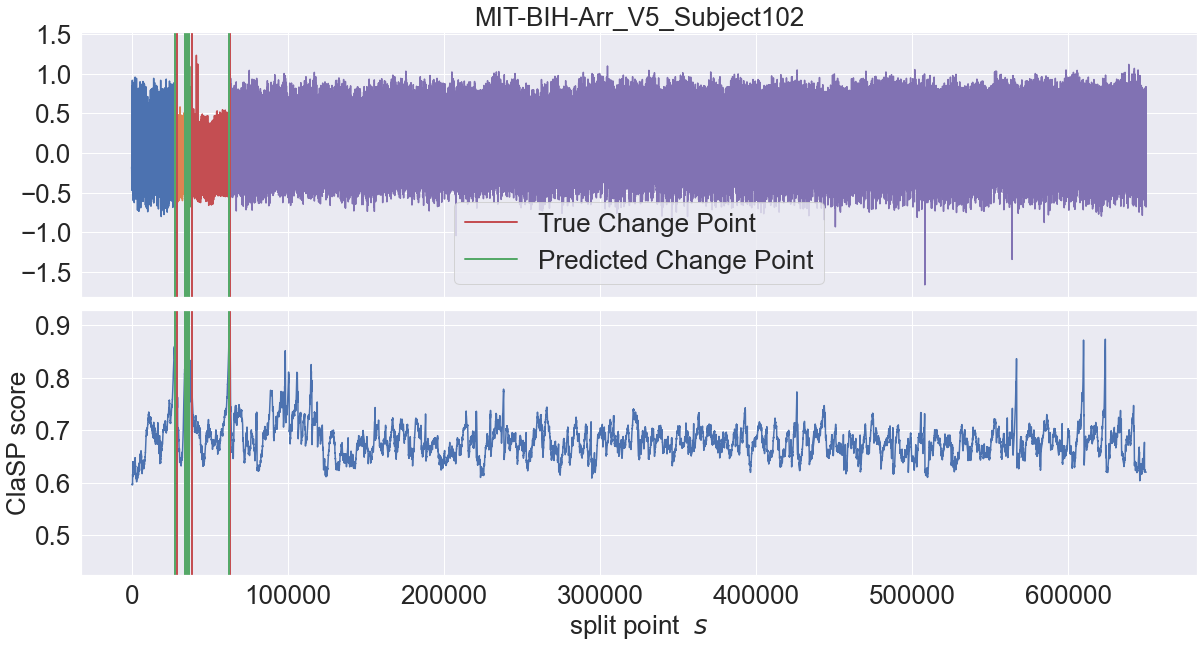

In [6]:
selection = 4
row = df_profiles.iloc[selection,:]
plot_profile_with_ts(row["dataset"], df_data.time_series.iloc[selection], np.array(row.profile), np.array(row.true_cps), np.array(row.found_cps), score="ClaSP score", show=False, save_path=None)